In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Cleaning, Wrangling & Pre-processing

### Overview
This notebook performs:
- Handling missing values
- Removing unnecessary columns
- Identifying and fixing outliers
- Formatting and standardizing data
- Saving the cleaned dataset for further processing

In [6]:
# Load dataset
df = pd.read_csv('/Users/sa3/Desktop/Financial Fraud Detection/Data/Raw Data.csv')

# Check column count
print("Detected columns:", df.columns)

# Display basic info
display(df.head())
display(df.info())
display(df.describe())

# Filtering only TRANSFER and CASH_OUT transactions
df_fraudalent = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

# Display basic info
display(df_fraudalent.head())
display(df_fraudalent.info())
display(df_fraudalent.describe())

Detected columns: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


None

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 253.6+ MB


None

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.420081e+02,3.175361e+05,4.764308e+04,1.609190e+04,1.703551e+06,2.049734e+06,2.964544e-03,5.775321e-06
std,1.416191e+02,8.877897e+05,2.513251e+05,1.512558e+05,4.225550e+06,4.676990e+06,5.436687e-02,2.403183e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,8.297354e+04,0.000000e+00,0.000000e+00,1.280734e+05,3.272891e+05,0.000000e+00,0.000000e+00
50%,2.360000e+02,1.712609e+05,3.039600e+02,0.000000e+00,5.557100e+05,8.280539e+05,0.000000e+00,0.000000e+00
75%,3.320000e+02,3.067912e+05,3.099700e+04,0.000000e+00,1.735900e+06,2.122198e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


/var/folders/z4/2rstd0cd6mbfdq_6f5c_3m_r0000gn/T/ipykernel_31498/2297546549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraudalent.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/z4/2rstd0cd6mbfdq_6f5c_3m_r0000gn/T/ipykernel_31498/2297546549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraudalent.fillna(0, inplace=True)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 211.4+ MB


None

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.420081e+02,3.175361e+05,4.764308e+04,1.609190e+04,1.703551e+06,2.049734e+06,2.964544e-03,5.775321e-06
std,1.416191e+02,8.877897e+05,2.513251e+05,1.512558e+05,4.225550e+06,4.676990e+06,5.436687e-02,2.403183e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,8.297354e+04,0.000000e+00,0.000000e+00,1.280734e+05,3.272891e+05,0.000000e+00,0.000000e+00
50%,2.360000e+02,1.712609e+05,3.039600e+02,0.000000e+00,5.557100e+05,8.280539e+05,0.000000e+00,0.000000e+00
75%,3.320000e+02,3.067912e+05,3.099700e+04,0.000000e+00,1.735900e+06,2.122198e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


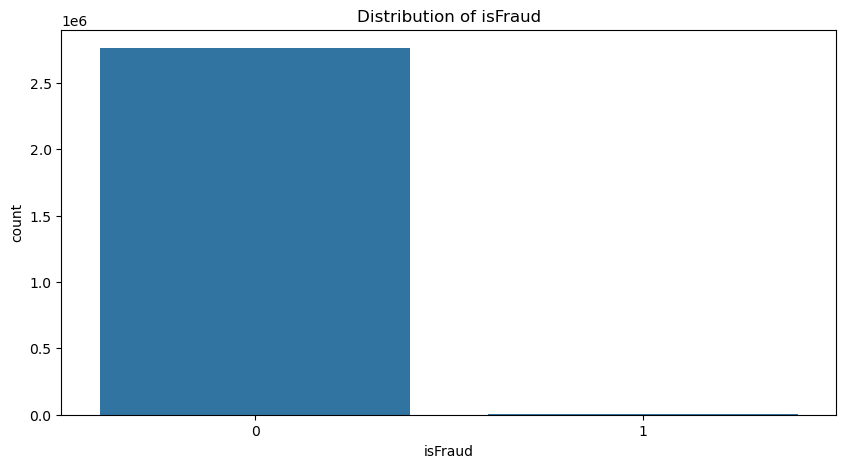

/var/folders/z4/2rstd0cd6mbfdq_6f5c_3m_r0000gn/T/ipykernel_31498/2297546549.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraudalent.drop(columns=[col for col in df.drop if col in df_fraudalent.columns], inplace=True)


Data cleaning completed


In [8]:
# Handling missing values
df_fraudalent.replace([np.inf, -np.inf], np.nan, inplace=True)
df_fraudalent.fillna(0, inplace=True)

# Display basic info
display(df_fraudalent.head())
display(df_fraudalent.info())
display(df_fraudalent.describe())

# Displaying the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.countplot(x='isFraud', data=df_fraudalent)
plt.title('Distribution of isFraud')
plt.show()

# Removing unnecessary columns
df.drop = ['nameOrig', 'nameDest']
df_fraudalent.drop(columns=[col for col in df.drop if col in df_fraudalent.columns], inplace=True)

# Saving the cleaned dataset
cleaned_file_path = "/Users/sa3/Desktop/Financial Fraud Detection/Data/Clean Data.csv"
df_fraudalent.to_csv(cleaned_file_path, index=False)

print(f"Data cleaning completed")
